In [179]:
import json
import pandas as pd
import numpy as np
from pathlib import Path

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [201]:
path_root = Path('/home/owl/PycharmProjects/Questions_search_task')

In [202]:
work_dataset = pd.read_csv(path_root / 'dataset_of_questions' /'work_dataset.csv', sep='\t')
work_dataset = work_dataset.drop('Unnamed: 0', axis=1)

In [203]:
work_dataset.head(10)

,line_information,Sign
0,"Все оборудованы эскалаторами , многие лифтами",.
1,"Павел , не соглашусь",.
2,- Как,?
3,Во вторник 20 сентября компания Navis Developm...,.
4,Почему тогда не с ЕР,?
5,"Его можно развернуть за 30 секунд , установить...",.
6,"Я понимаю , что это одно из самых закрытых гос...",?
7,Анекдот На 9 месяце беременности попросила муж...,.
8,Чего добиваются,?
9,Еще в июле нефть торговалась по 147 долларов з...,.


In [204]:
def class_return(sign):
    return 1 if sign == '?' else 0


work_dataset['label'] = work_dataset['Sign'].apply(class_return)

In [205]:
work_dataset.head()

,line_information,Sign,label
0,"Все оборудованы эскалаторами , многие лифтами",.,0
1,"Павел , не соглашусь",.,0
2,- Как,?,1
3,Во вторник 20 сентября компания Navis Developm...,.,0
4,Почему тогда не с ЕР,?,1


In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [8]:
fit_object = TfidfVectorizer()
fit_object.fit(work_dataset['line_information'])

TfidfVectorizer()

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
train_data, test_data, train_label, test_label = train_test_split(work_dataset, work_dataset['label'], test_size=0.3, random_state=0)

In [11]:
fit_work_matrix = fit_object.transform(train_data['line_information'])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
gscv_obj_3 = GridSearchCV(LogisticRegression(), param_grid, cv=3)
gscv_obj_3.fit(fit_work_matrix, train_label)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [29]:
test_work_matrix = fit_object.transform(test_data['line_information'])

In [136]:
best_model = gscv_obj_3.best_estimator_
predict_answer = best_model.predict(test_work_matrix)

In [40]:
classification_assessment = classification_report(test_label, predict_answer, output_dict=True)

In [41]:
for key, value in classification_assessment.items():
    print(key, value)

0 {'precision': 0.8346558832664446, 'recall': 0.8605289264500898, 'f1-score': 0.8473949590223484, 'support': 159266}
1 {'precision': 0.8567106604223916, 'recall': 0.8302690064328985, 'f1-score': 0.8432826106971532, 'support': 159959}
accuracy 0.8453661210744773
macro avg {'precision': 0.845683271844418, 'recall': 0.8453989664414941, 'f1-score': 0.8453387848597508, 'support': 319225}
weighted avg {'precision': 0.845707211010475, 'recall': 0.8453661210744773, 'f1-score': 0.8453343211470257, 'support': 319225}


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.92')

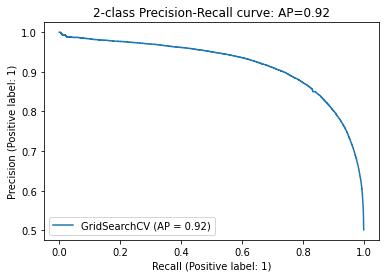

In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gscv_obj_3, test_work_matrix, test_label)
disp.ax_.set_title(f'2-class Precision-Recall curve: AP={0.92}')

In [ ]:
# param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
# gscv_obj_3 = GridSearchCV(LogisticRegression(), param_grid, cv=3)
# gscv_obj_3.fit(fit_work_matrix, train_label)

In [43]:
from sklearn.metrics import confusion_matrix

matrix_erorrs = pd.DataFrame()
print(confusion_matrix(test_label, predict_answer))

[[137053  22213]
 [ 27150 132809]]


In [206]:
predict_label = pd.Series(predict_answer, name='pr_label')

In [207]:
data_errors = pd.DataFrame()

data_errors = test_data

In [208]:
data_errors['pr_label'] = predict_answer

In [209]:
data_errors

,line_information,Sign,label,pr_label
163316,Ведь мы тоже на 70-80 % состоим из воды,.,0,0
343565,"Интересно , что за страна",?,1,1
1038894,Романтический вечер посреди озера,?,1,0
188401,"Не очень понятно , а вы евреев за что не любите",?,1,1
255198,Все объекты расположены в удобных местах с раз...,.,0,0
...,...,...,...,...
557409,Премьер-министр Египта Камаль аль-Ганзури напр...,.,0,0
320926,"Их потолок - беркут танкануть , машину сжечь",.,0,1
103509,Готовы убивать даже за слова ? ?,?,1,1
435542,- А поконкретнее,?,1,1


In [210]:
data_errors = data_errors.loc[data_errors['label'] != data_errors['pr_label']]
print(data_errors.shape)

(49363, 4)


In [211]:
data_errors.head(50)

,line_information,Sign,label,pr_label
1038894,Романтический вечер посреди озера,?,1,0
684736,А когда кризис начнется в США,?,1,0
864901,аль как она стала та самой большой ?,?,1,0
690095,После оглашения показаний защита завалила Товп...,?,1,0
496835,а как же разнообразие иногда,?,1,0
69421,"День начинается – нам тут же кажется , что дол...",.,0,1
757568,– А с Игорем Владимировичем Малышевым,?,1,0
418113,Какой процент от запланированных работ удастся...,?,1,0
1047470,Не понял только по поводу & quot ; И после про...,?,1,0
953911,А ведь когда-то Жириновский был ярым ельцинистом,.,0,1


In [212]:
def sign_return(sign):
    return '?' if sign == 1 else 'NQ'


# data_errors.drop([data_errors['label']])

data_errors['pr_label'] = data_errors['pr_label'].apply(sign_return)

In [213]:
data_errors

,line_information,Sign,label,pr_label
1038894,Романтический вечер посреди озера,?,1,NQ
684736,А когда кризис начнется в США,?,1,NQ
864901,аль как она стала та самой большой ?,?,1,NQ
690095,После оглашения показаний защита завалила Товп...,?,1,NQ
496835,а как же разнообразие иногда,?,1,NQ
...,...,...,...,...
204016,RT @ US_Democracy : `` Либеральный активист ''...,?,1,NQ
617294,А Хазин их еще и дразнил,.,0,?
723400,"Единая Россия , Справедливая Россия , уже в гл...",?,1,NQ
929081,"знаешь , но даже сейчас это все выглядит шикар...",?,1,NQ


In [214]:
data_errors.drop('label', axis=1, inplace=True)

In [215]:
data_errors.head(50)

,line_information,Sign,pr_label
1038894,Романтический вечер посреди озера,?,NQ
684736,А когда кризис начнется в США,?,NQ
864901,аль как она стала та самой большой ?,?,NQ
690095,После оглашения показаний защита завалила Товп...,?,NQ
496835,а как же разнообразие иногда,?,NQ
69421,"День начинается – нам тут же кажется , что дол...",.,?
757568,– А с Игорем Владимировичем Малышевым,?,NQ
418113,Какой процент от запланированных работ удастся...,?,NQ
1047470,Не понял только по поводу & quot ; И после про...,?,NQ
953911,А ведь когда-то Жириновский был ярым ельцинистом,.,?


In [216]:
data_errors.to_csv('error_sentenses.scv', sep='\t')